In [26]:
!python --version
!pip --version

Python 3.11.11
pip 24.1.2 from /usr/local/lib/python3.11/dist-packages/pip (python 3.11)


In [109]:
df = pd.read_csv('student.csv')

In [110]:
# Select the 'name' column
name_column = df["name"]


In [111]:
# Select the 'name' and 'mark' columns
selected_columns = df[["name", "mark"]]


In [112]:
# Select rows where 'class' is 'Four'
class_four_students = df[df["class"] == "Four"]


In [113]:
# Add 'passed' column (Pass if mark >= 60, otherwise Fail)
df["passed"] = df["mark"].apply(lambda x: "Pass" if x >= 60 else "Fail")


In [114]:
# Rename the 'mark' column to 'score'
df.rename(columns={"mark": "score"}, inplace=True)


In [115]:
# Drop the 'passed' column
df.drop(columns=["passed"], inplace=True)


In [132]:
# Group by 'class' and calculate the mean of 'mark'
class_mean_score = df.groupby("class")["score"].mean()
print(class_mean_score)



class
Eight    79.000000
Fifth    78.000000
Five     80.000000
Four     68.750000
Nine     41.500000
Seven    77.600000
Six      82.571429
Three    73.666667
Name: score, dtype: float64


In [121]:
# Count the number of students in each class
students_per_class = df["class"].value_counts()
print(students_per_class)


class
Seven    10
Four      8
Six       7
Three     3
Five      2
Nine      2
Fifth     1
Eight     1
Name: count, dtype: int64


In [123]:
# Create the pivot table
pivot_table = df.pivot_table(values="score", index="class", columns="gender", aggfunc="mean")
print(pivot_table)


gender  female  male
class               
Eight      NaN  79.0
Fifth      NaN  78.0
Five       NaN  80.0
Four      63.8  77.0
Nine      65.0  18.0
Seven     81.4  73.8
Six       89.2  54.0
Three      NaN  70.0


In [124]:
# Function to assign grades based on marks
def assign_grade(score):
    if score >= 85:
        return "A"
    elif score >= 70:
        return "B"
    elif score >= 60:
        return "C"
    else:
        return "D"

# Apply the function to create the 'grade' column
df["grade"] = df["score"].apply(assign_grade)
print(df)


    id         name  class  score  gender grade
0    1     John Deo   Four     75  female     B
1    2     Max Ruin  Three     85    male     A
2    3       Arnold  Three     55    male     D
3    4   Krish Star   Four     60  female     C
4    5    John Mike   Four     60  female     C
5    6    Alex John   Four     55    male     D
6    7  My John Rob  Fifth     78    male     B
7    8       Asruid   Five     85    male     A
8    9      Tes Qry    Six     78     NaN     B
9   10     Big John   Four     55  female     D
10  11       Ronald    Six     89  female     A
11  12        Recky    Six     94  female     A
12  13          Kty  Seven     88  female     A
13  14         Bigy  Seven     88  female     A
14  15     Tade Row    NaN     88    male     A
15  16        Gimmy   Four     88    male     A
16  17        Tumyu    Six     54    male     D
17  18        Honny   Five     75    male     B
18  19        Tinny   Nine     18    male     D
19  20       Jackly   Nine     65  femal

In [127]:
# Sort the DataFrame by 'score' in descending order
df_sorted = df.sort_values("score", ascending=False)
print(df_sorted)


    id         name  class  score  gender grade
32  33    Kenn Rein    Six     96  female     A
11  12        Recky    Six     94  female     A
31  32    Binn Rott  Seven     90  female     A
10  11       Ronald    Six     89  female     A
24  25     Giff Tow  Seven     88    male     A
15  16        Gimmy   Four     88    male     A
14  15     Tade Row    NaN     88    male     A
13  14         Bigy  Seven     88  female     A
12  13          Kty  Seven     88  female     A
34  35   Rows Noump    Six     88  female     A
30  31  Marry Toeey   Four     88    male     A
27  28    Rojj Base  Seven     86  female     A
7    8       Asruid   Five     85    male     A
1    2     Max Ruin  Three     85    male     A
26  27          NaN  Three     81     NaN     B
22  23        Herod  Eight     79    male     B
29  30    Reppy Red    Six     79  female     B
25  26       Crelea  Seven     79    male     B
8    9      Tes Qry    Six     78     NaN     B
6    7  My John Rob  Fifth     78    mal

In [129]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

# Define the file path in Google Drive
save_path = "/content/drive/My Drive/student_with_grades.csv"

# Save the DataFrame as a CSV file
df.to_csv(save_path, index=False)

# Print confirmation
print(f"File saved successfully at: {save_path}")


Mounted at /content/drive
File saved successfully at: /content/drive/My Drive/student_with_grades.csv


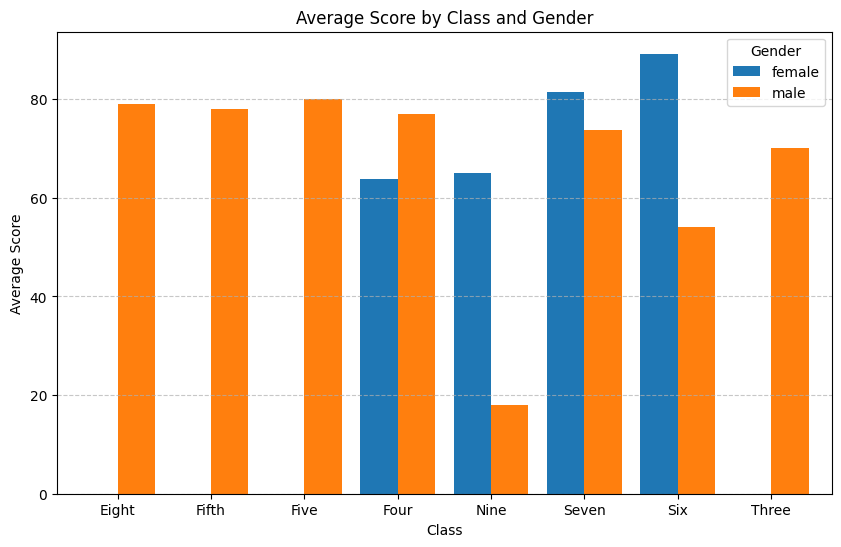

In [131]:
import matplotlib.pyplot as plt

# Plot the pivot table as a column chart (bar chart)
pivot_table.plot(kind="bar", figsize=(10, 6), width=0.8)

# Customize the chart
plt.title("Average Score by Class and Gender")
plt.xlabel("Class")
plt.ylabel("Average Score")
plt.xticks(rotation=0)  # Keep class labels readable
plt.legend(title="Gender")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()
